In [1]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt


sys.path.append('/home/jacob/projects/quonium/python')
from config import colr
from config import config

conf = config()
conf.echoParams()

L : 1000
dt : 1.0
T : 0.3
tFn : 100
NY : 1
Nbb : 399999
pSampleType : 0
UniPMax : 3.0
pSampSig : 0.2
MatrElems : 0
qRGtype : 0
ECut : 40
prCut : 22
NPts : 200
ExportRates : True
NXPart : 60
NThreads : 14
HydroMode : 0
HPts : 20
doRecom : 1
doDisso : 1
RGRrateOpt : 1
Mb : 4.65
M1S : 9.091
M2S : 10.023
E1S : 0.20925
E2S : 0.723
bsig : 0.01
Ysig : 0.02
alphaS : 0.3
CF : 1.3333333333333333
NC : 3
gs : 0.75
Ch : 0
rateFile : bottom_rates_2d.tsv
boop : gleep


In [2]:
from mathFunc2 import doConfigCalc
import mathFunc2 as mF

col1, col2, col3 = '#EE2211', '#11CC22', '#1111EE'

conf['StateList'] = ['1S']
conf['ChannelList'] = ['RGA','IDQ','IDG','RGR','IRQ','IRG']
#conf['ChannelList'] = ['RGR','IRQ','IRG']
#conf['ChannelList'] = ['IRQ']
doConfigCalc(conf)

Constants set
RGA_rate1S set
IDQ_rate1S set
IDG_rate1S set
RGR_rateFv1S set
IRQ_vInt1S set
IRQ_rateFv1S set
IRG_vInt1S set
IRG_rateFv1S set


In [3]:
from mathFunc2 import fB, vFp, calcClassExpec, calcRelExpec2
def Ntot(dist, sep):
    return np.sum(dist)*sep
def runExp2(conf, pPts, DchInt, RchInt, st):
    bD, qD = fB(pPts, conf['M'+st], conf['T'])*conf['NY'], fB(pPts, conf['Mb'], conf['T'])*conf['Nbb']
    s = pPts[1]-pPts[0]
    res = [[0,Ntot(bD,s)/(Ntot(bD,s)+Ntot(qD,s))]]
    vPtsq = vFp(pPts, conf['Mb'])
    vPtsST = vFp(pPts, conf['M'+st])
    for i in range(conf['tFn']):
        if i == 0:
            continue
        Dtot = pPts*0
        Rtot = pPts*0
        for ch in DchInt:
            Dtot += ch(vPtsST)*bD*conf['dt']
        for ch in RchInt:
            Rtot += ch(vPtsq)*qD*Ntot(qD,s)*conf['dt']
        bD = bD-Dtot+(Ntot(Rtot,s)*fB(pPts, conf['M'+st], conf['T']))
        qD = qD-Rtot+(Ntot(Dtot,s)*fB(pPts, conf['Mb'], conf['T']))
        res.append([i*conf['dt'],Ntot(bD,s)/(Ntot(bD,s)+Ntot(qD,s))])
    return np.array(res)

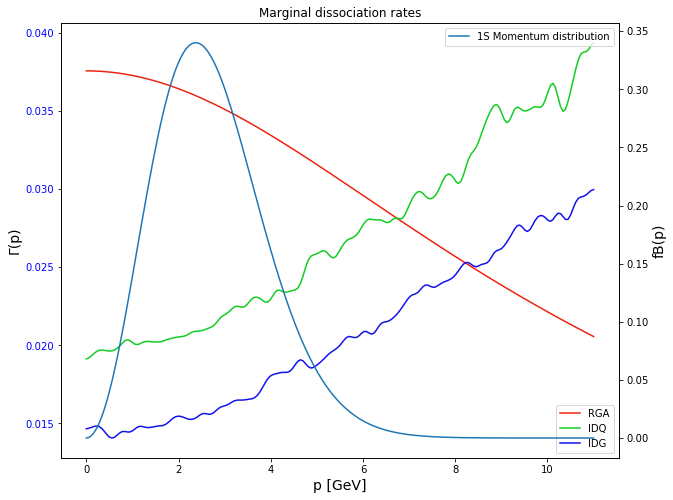

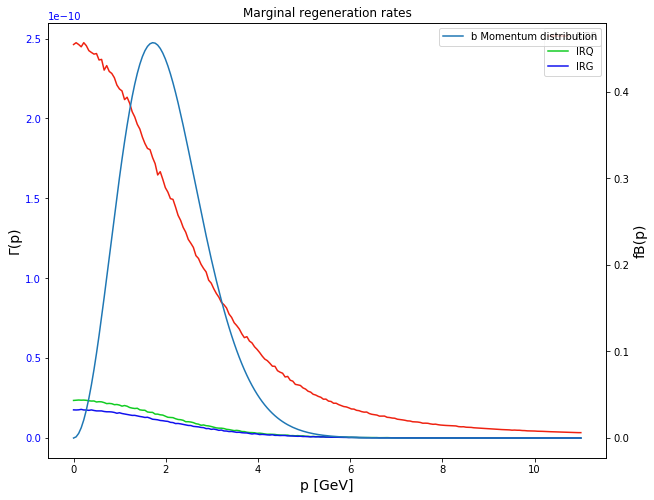

In [4]:
### 1S rates and suppression

pPts = mF.getpPts(conf)
vPtsq = mF.vFp(pPts, conf['Mb'])
vPts1S = mF.vFp(pPts, conf['M1S'])

#Dissociation Channels Plot

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_xlabel('p [GeV]',fontsize=14)
ax1.set_ylabel('Γ(p)',fontsize=14)
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.set_ylabel('fB(p)', fontsize=14)
ax2.tick_params(axis='y', labelcolor='k')

ax2.plot(pPts, mF.fB(pPts,conf['M1S'],conf['T']), label='1S Momentum distribution')
ax1.plot(pPts, conf['RGA_rate1S'](vPts1S),color=col1,label='RGA')
ax1.plot(pPts, conf['IDQ_rate1S'](vPts1S),color=col2,label='IDQ')
ax1.plot(pPts, conf['IDG_rate1S'](vPts1S),color=col3,label='IDG')

ax1.legend()
ax2.legend()
plt.title('Marginal dissociation rates')
plt.show()

# Regeneration Channels Plot

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_xlabel('p [GeV]',fontsize=14)
ax1.set_ylabel('Γ(p)', fontsize=14)
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.set_ylabel('fB(p)', fontsize=14)
ax2.tick_params(axis='y', labelcolor='k')

ax2.plot(pPts, mF.fB(pPts,conf['Mb'],conf['T']), label='b Momentum distribution')
ax1.plot(pPts, conf['RGR_rateFv1S'](vPtsq),color=col1,label='RGR')
ax1.plot(pPts, conf['IRQ_rateFv1S'](vPtsq),color=col2,label='IRQ')
ax1.plot(pPts, conf['IRG_rateFv1S'](vPtsq),color=col3,label='IRG')

ax1.legend()
ax2.legend()
plt.title('Marginal regeneration rates')
plt.show()


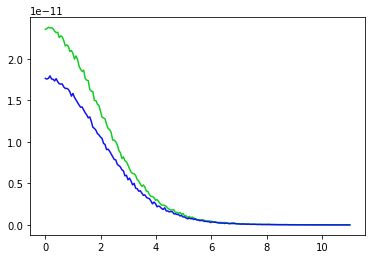

In [5]:
plt.plot(pPts, conf['IRQ_rateFv1S'](vPtsq),color=col2,label='IRQ')
plt.plot(pPts, conf['IRG_rateFv1S'](vPtsq),color=col3,label='IRG')

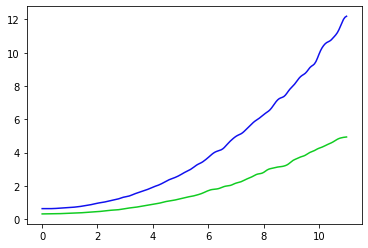

In [6]:
#plt.plot(pPts, mF.(vPtsq),color=col2,label='RGR')
plt.plot(pPts, conf['IRQ_vInt1S'](vPtsq),color=col2,label='IRQ')
plt.plot(pPts, conf['IRG_vInt1S'](vPtsq),color=col3,label='IRG')

nonrel-Nhid/Ntot: 0.001730484230463492
rel-Nhid/Ntot: 0.0014666271038068232


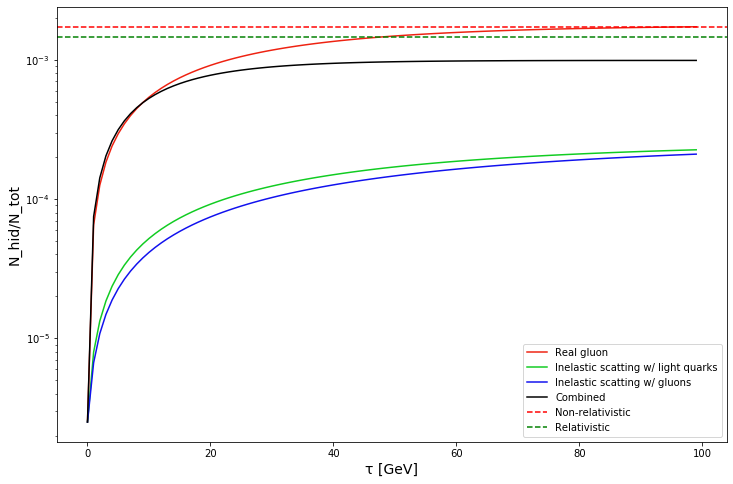

nonrel-Nhid/Ntot: 0.001730484230463492
rel-Nhid/Ntot: 0.0014666271038068232


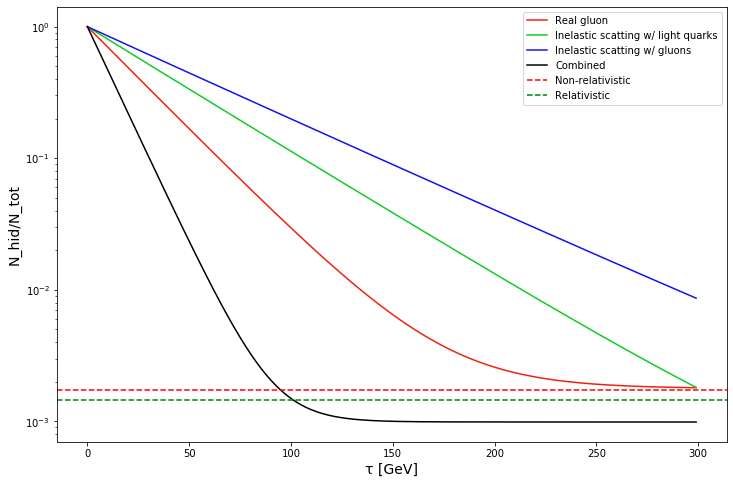

In [7]:
RGexp = runExp2(conf, pPts, [conf['RGA_rate1S']], [conf['RGR_rateFv1S']], '1S')
IQexp = runExp2(conf, pPts, [conf['IDQ_rate1S']], [conf['IRQ_rateFv1S']], '1S')
IGexp = runExp2(conf, pPts, [conf['IDG_rate1S']], [conf['IRG_rateFv1S']], '1S')
totexp = runExp2(conf, pPts, [conf['RGA_rate1S'],conf['IDQ_rate1S'],conf['IDG_rate1S']], [conf['RGR_rateFv1S'],conf['IRQ_rateFv1S'],conf['IRG_rateFv1S']], '1S')


#tPts = gettauPts(conf)
plt.figure(figsize=(12, 8))
plt.plot(RGexp[:,0], RGexp[:,1], color=col1, label='Real gluon')
plt.plot(IQexp[:,0], IQexp[:,1], color=col2, label='Inelastic scatting w/ light quarks')
plt.plot(IGexp[:,0], IGexp[:,1], color=col3, label='Inelastic scatting w/ gluons')
plt.plot(totexp[:,0], totexp[:,1], color='k', label='Combined')
plt.axhline(y=calcClassExpec(conf), color='r', linestyle='--', label='Non-relativistic')
plt.axhline(y=calcRelExpec2(conf), color='g', linestyle='--', label='Relativistic')
plt.xlabel('τ [GeV]',fontsize=14)
plt.ylabel('N_hid/N_tot',fontsize=14)
plt.yscale('log')
plt.legend()
plt.show()

conf['Nbb'], conf['NY'] = conf['NY'], conf['Nbb'] #switch
conf['tFn'] = 300
RGexp2 = runExp2(conf, pPts, [conf['RGA_rate1S']], [conf['RGR_rateFv1S']], '1S')
IQexp2 = runExp2(conf, pPts, [conf['IDQ_rate1S']], [conf['IRQ_rateFv1S']], '1S')
IGexp2 = runExp2(conf, pPts, [conf['IDG_rate1S']], [conf['IRG_rateFv1S']], '1S')
totexp2 = runExp2(conf, pPts, [conf['RGA_rate1S'],conf['IDQ_rate1S'],conf['IDG_rate1S']], [conf['RGR_rateFv1S'],conf['IRQ_rateFv1S'],conf['IRG_rateFv1S']], '1S')
conf['Nbb'], conf['NY'] = conf['NY'], conf['Nbb'] #switch back

#tPts = gettauPts(conf)
plt.figure(figsize=(12, 8))
plt.plot(RGexp2[:,0], RGexp2[:,1], color=col1, label='Real gluon')
plt.plot(IQexp2[:,0], IQexp2[:,1], color=col2, label='Inelastic scatting w/ light quarks')
plt.plot(IGexp2[:,0], IGexp2[:,1], color=col3, label='Inelastic scatting w/ gluons')
plt.plot(totexp2[:,0], totexp2[:,1], color='k', label='Combined')
plt.axhline(y=calcClassExpec(conf), color='r', linestyle='--', label='Non-relativistic')
plt.axhline(y=calcRelExpec2(conf), color='g', linestyle='--', label='Relativistic')
plt.xlabel('τ [GeV]',fontsize=14)
plt.ylabel('N_hid/N_tot',fontsize=14)
plt.yscale('log')
plt.legend()
plt.show()

In [8]:
print([conf[cN] for cN in ["RGR_C","IDQ_C","IDG_C","RGA_C","IRQ_C","IRG_C"]])

[0.02222222222222222, 0.0009547363496856436, 0.0003580261311321163, 0.009422870078737412, 0.0006754745576155851, 0.0002533029591058444]


In [9]:
### Temperature dependent plots

def getTotalRateDiss(RateFv, conf, st):
    pPts = mF.getpPts(conf)
    vPts = mF.vFp(pPts,conf['M'+st])
    s = pPts[1]-pPts[0]
    return Ntot(mF.fB(pPts,conf['M'+st],conf['T'])*RateFv(vPts),s)
    

def getTotalRateRecom(RateFv, conf, st):
    pPts = mF.getpPts(conf)
    vPts = mF.vFp(pPts,conf['Mb'])
    s = pPts[1]-pPts[0]
    return Ntot(mF.fB(pPts,conf['Mb'],conf['T'])*RateFv(vPts),s)    

#c2=config()
#Tpts = np.linspace(0.15,0.45,7)
#c2['StateList'] = ['1S']
#c2['ChannelList'] = ['RGA','IDQ','IDG']
#res1 = {ch:[] for ch in c2['ChannelList']}
#for Tmp in Tpts:
#    print('T =', Tmp)
#    c2 = config()
#    c2['StateList'] = ['1S']
#    c2['ChannelList'] = ['RGA','IDQ','IDG']
#    c2['T'] = Tmp
#    doConfigCalc(c2)
#    for ch in c2['ChannelList']:
#        if ch in ['RGA','IDQ','IDG']:
#            print('boop')
#            res1[ch].append(getTotalRateDiss(c2[ch+'_rate1S'],c2,'1S'))
#        elif ch in ['RGR','IRQ','IRG']:
#            res1[ch].append(getTotalRateRecom(c2[ch+'_rateFv1S'],c2,'1S'))
        
        
        


### Dissociation


In [10]:
res1

NameError: name 'res1' is not defined

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(Tpts, np.array(res1['RGA']), color=col1, label='RGA')
plt.plot(Tpts, np.array(res1['IDQ']), color=col2, label='IDQ')
plt.plot(Tpts, np.array(res1['IDG']), color=col3, label='IDG')
plt.xlabel('T [GeV]', fontsize=14)
plt.ylabel('⟨Γ_1S⟩ [GeV]',fontsize=14)
plt.legend()
plt.title('Total dissociation rates as a function of temperature')
plt.show()

In [ ]:
res1['RGA']